<a href="https://colab.research.google.com/github/monarkparekh/MAE-598__Design-Optimization/blob/Assignment-3/MAE_598__Design_Optimization_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1>MAE 598 Design Optimization: 
Assignment 3</h1></b>

<h2>Name: Monark Parekh <br>
ASU ID: 1222179426</h2>


<h2><b> Question 1 <b></h2>

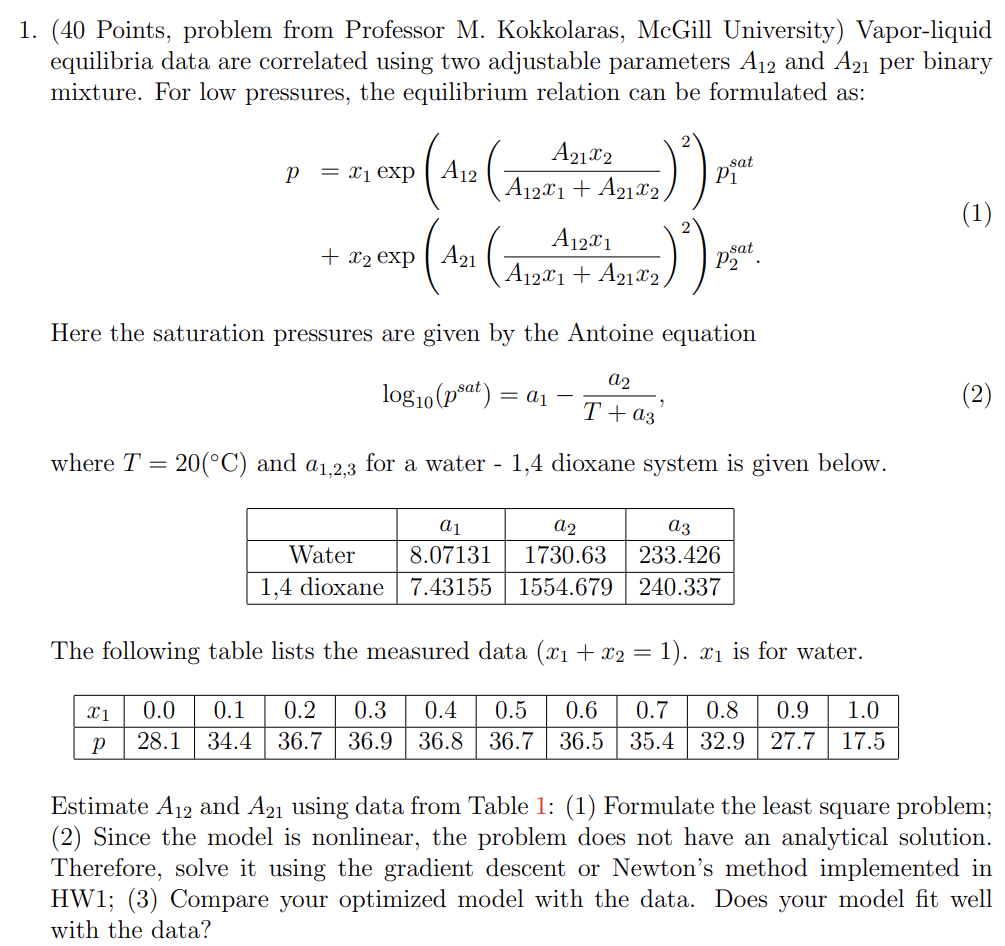

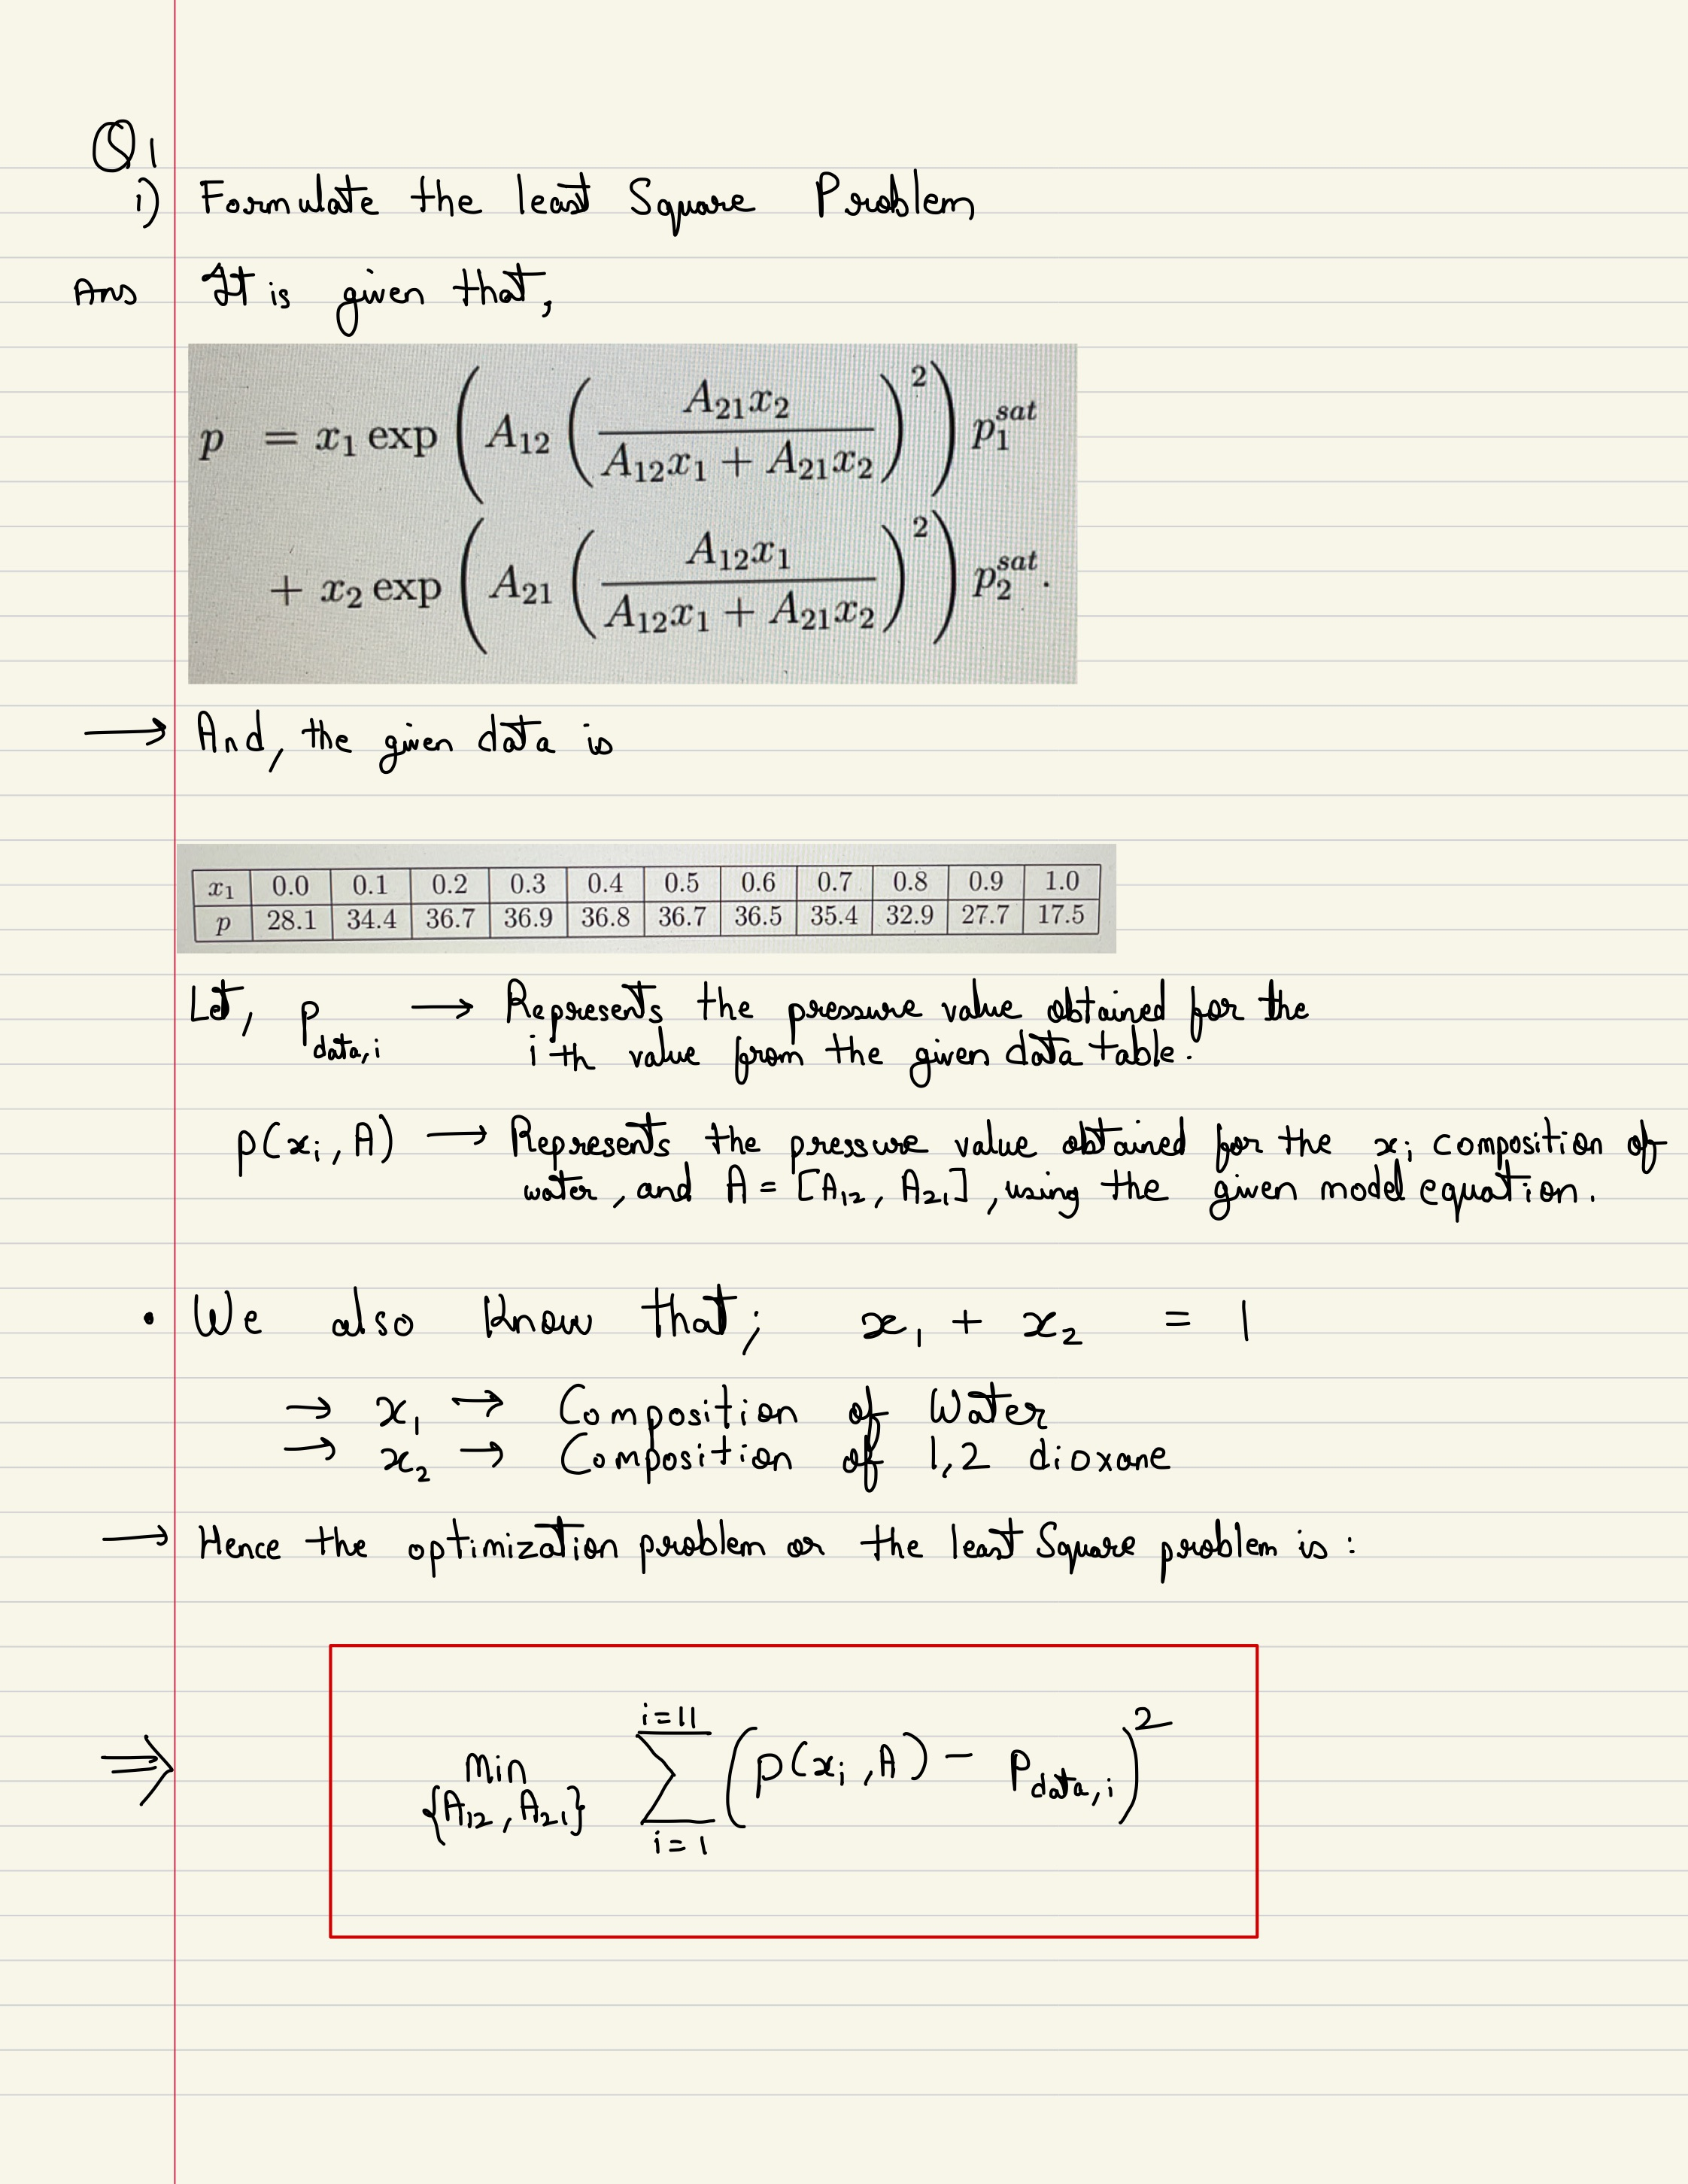

Importing the required libraries

In [ ]:
from sympy import symbols, diff
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sympy import exp

Defining the p1 and p2 saturation values

In [ ]:
T = 20
a1, a2, a3 = 8.07131, 1730.63, 233.426
p1_sat = 10**(a1 - (a2/(T + a3)))
a1, a2, a3 = 7.43155 , 1554.679, 240.337
p2_sat = 10**(a1 - (a2/(T + a3)))

Defining the given data

In [ ]:
data = [['x1','p'],[0,28.1], [0.1,34.4], [0.2,36.7], [0.3,36.9], [0.4,36.8], [0.5,36.7], [0.6,36.5], [0.7,35.4], [0.8,32.9], [0.9,27.7], [1,17.5]]
print(tabulate(data, headers='firstrow', tablefmt='fancy_grid'))

╒══════╤══════╕
│   x1 │    p │
╞══════╪══════╡
│  0   │ 28.1 │
├──────┼──────┤
│  0.1 │ 34.4 │
├──────┼──────┤
│  0.2 │ 36.7 │
├──────┼──────┤
│  0.3 │ 36.9 │
├──────┼──────┤
│  0.4 │ 36.8 │
├──────┼──────┤
│  0.5 │ 36.7 │
├──────┼──────┤
│  0.6 │ 36.5 │
├──────┼──────┤
│  0.7 │ 35.4 │
├──────┼──────┤
│  0.8 │ 32.9 │
├──────┼──────┤
│  0.9 │ 27.7 │
├──────┼──────┤
│  1   │ 17.5 │
╘══════╧══════╛


Determining the Gradient of the given pressure function

In [ ]:
A12, A21, x1, x2 = symbols('A12 A21 x1 x2', real=True)
f = (x1 * exp(A12 * ((A21*x2/(A12*x1 + A21*x2))**2)) * p1_sat) + (x2 * exp(A21 * ((A12*x1/(A12*x1 + A21*x2))**2)) * p2_sat)
grad = [0,0]
grad[0] = diff(f, A12)
grad[1] = diff(f, A21)
print(f'G1 = {grad[0]}\nG2 = {grad[1]}')
symbolsToDelete = ('A12', 'A21', 'x1', 'x2')
for z0 in symbolsToDelete:
    del globals()[z0]

G1 = 17.4732520845971*x1*(-2*A12*A21**2*x1*x2**2/(A12*x1 + A21*x2)**3 + A21**2*x2**2/(A12*x1 + A21*x2)**2)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(-2*A12**2*A21*x1**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x1**2/(A12*x1 + A21*x2)**2)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2)
G2 = 17.4732520845971*x1*(-2*A12*A21**2*x2**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x2**2/(A12*x1 + A21*x2)**2)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(-2*A12**2*A21*x1**2*x2/(A12*x1 + A21*x2)**3 + A12**2*x1**2/(A12*x1 + A21*x2)**2)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2)


Defining the given pressure function 'p'

In [ ]:
def p(x1, A12, A21):
  x2 = 1 - x1
  T1 = x1 * exp(A12 * ((A21*x2/(A12*x1 + A21*x2))**2)) * p1_sat
  T2 = x2 * exp(A21 * ((A12*x1/(A12*x1 + A21*x2))**2)) * p2_sat
  function_value_p = T1 + T2
  G1 = 17.4732520845971*x1*(-2*A12*A21**2*x1*x2**2/(A12*x1 + A21*x2)**3 + A21**2*x2**2/(A12*x1 + A21*x2)**2)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(-2*A12**2*A21*x1**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x1**2/(A12*x1 + A21*x2)**2)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2) 
  G2 = 17.4732520845971*x1*(-2*A12*A21**2*x2**3/(A12*x1 + A21*x2)**3 + 2*A12*A21*x2**2/(A12*x1 + A21*x2)**2)*exp(A12*A21**2*x2**2/(A12*x1 + A21*x2)**2) + 28.8240995274052*x2*(-2*A12**2*A21*x1**2*x2/(A12*x1 + A21*x2)**3 + A12**2*x1**2/(A12*x1 + A21*x2)**2)*exp(A12**2*A21*x1**2/(A12*x1 + A21*x2)**2)
  gradient = np.array([[G1, G2],])

  return function_value_p, gradient

Defining the given Objective Function

In [ ]:
def objective_function(data, A12, A21):
  objective_value = 0
  objective_gradient = 0

  for i in range(1,12):
    temp1,temp2 = p(data[i][0],A12, A21)
    objective_value = objective_value + ((temp1 - data[i][1])**2)
    objective_gradient = objective_gradient + (2*(temp1 - data[i][1])*(temp2))
    
  return objective_value, objective_gradient

<b>Line Search Algorithm</b>

In [ ]:
def linesearchalgorithm(x):
    x = np.array([x,])
    alpha = 1
    t = 0.3
    beta = 0.5
    function_value,gradient = objective_function(data, x[0][0], x[0][1])
    temp = -1 * gradient

    # Defining the function to calculate phi(alpha)
    def pi(alpha, x):
      temp = -1 * gradient
      return function_value - alpha * t * np.matmul(temp,np.transpose(gradient))

    # Comparing phi(alpha) and f(x - alpha*gradient)
    x_new = x + alpha*temp
    obj = objective_function(data, x_new[0][0], x_new[0][1])[0]
    while pi(alpha, x) <  obj:
      temp = -1 * gradient
      alpha = beta * alpha
      x_new = x + alpha*temp
      obj = objective_function(data, x_new[0][0], x_new[0][1])[0]
    # Returning the Final value of alpha
    return beta * alpha

# <b>Gradient Descent Algorithm</b>

In [ ]:
def gradientdescentalgorithm(x0,maximum_iteration):
  epsilon = (10)**-3
  A = []
  error_values = []
  gradient_normal = []
  A.append(x0)
  for k in range(0,maximum_iteration):
      obj_p, gradient = objective_function(data,A[k][0],A[k][1])
      gradient_normal.append(np.linalg.norm(gradient.astype(np.float)))
      error_values.append(obj_p)
      if gradient_normal[k] <= epsilon:
        print(f'\nThe Newtons Algorithm has converged to a point in {k} iterations\n')
        print(f'Current Gradient Normal is {gradient_normal[k]}\n[A12, A21] = {A[k]}')
        return A,gradient_normal,(k),error_values
      #alpha = 0.0019
      alpha = linesearchalgorithm(A[k])
      new_A = A[k] - alpha*gradient
      A.append([new_A[0][0],new_A[0][1]])
      if k == (maximum_iteration - 1):
        print(f"Number of iterations has exceeded the maximum iterations, still not converged to the given threshold.\nCurrent Gradient Normal is {gradient_normal[k]}\nCurrent point is {A[k]}")
        return A,gradient_normal,(k),error_values

In [ ]:
x0 = np.array([1,1])
maximum_iteration = 50
A,gradient_normal,(k),error_values = gradientdescentalgorithm(x0,maximum_iteration)
print(f'The Final Value of the Objective Function is : {error_values[k]}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':



The Newtons Algorithm has converged to a point in 35 iterations

Current Gradient Normal is 0.0006289878880645151
[A12, A21] = [1.95841524074012, 1.68918822243082]
The Final Value of the Objective Function is : 0.670194002793974


<h2> <b> Comparsion of the Optimized Model with the Data

In [ ]:
data_x = []
data_y = []
for i in range(1,12):
  data_x.append(data[i][0])
  data_y.append(data[i][1])
data_x2 = np.flip(data_x)
A12 = A[k][0]
A21 = A[k][1]
x1_plt = np.linspace(0, 1, 100)
x2_plt = np.flip(x1_plt).copy() 
p_plt = []
for i in range(0,100):
   value, g = p(x1_plt[i], A12, A21)
   p_plt.append(value)

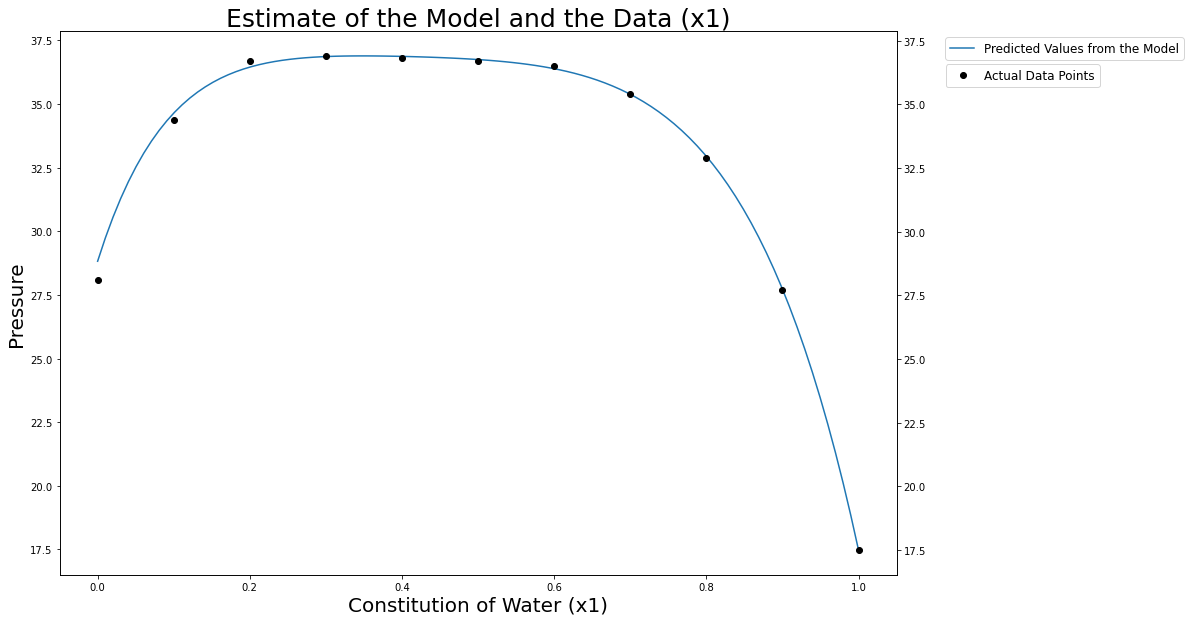

In [ ]:
plott, ax1 = plt.subplots(figsize = (15,10))
ax2 = ax1.twinx()
ax1.plot(x1_plt,p_plt,alpha=1)
ax2.plot(data_x,data_y,'ko',alpha=1,)
plt.title('Estimate of the Model and the Data (x1)', fontsize = 25)
ax1.set_xlabel('Constitution of Water (x1)', fontsize = 20)
ax1.set_ylabel('Pressure', fontsize = 20)
ax1.legend(["Predicted Values from the Model"], bbox_to_anchor = (1.35, 1), fontsize = 12)
ax2.legend(['Actual Data Points'], bbox_to_anchor = (1.25, 0.95), fontsize = 12)

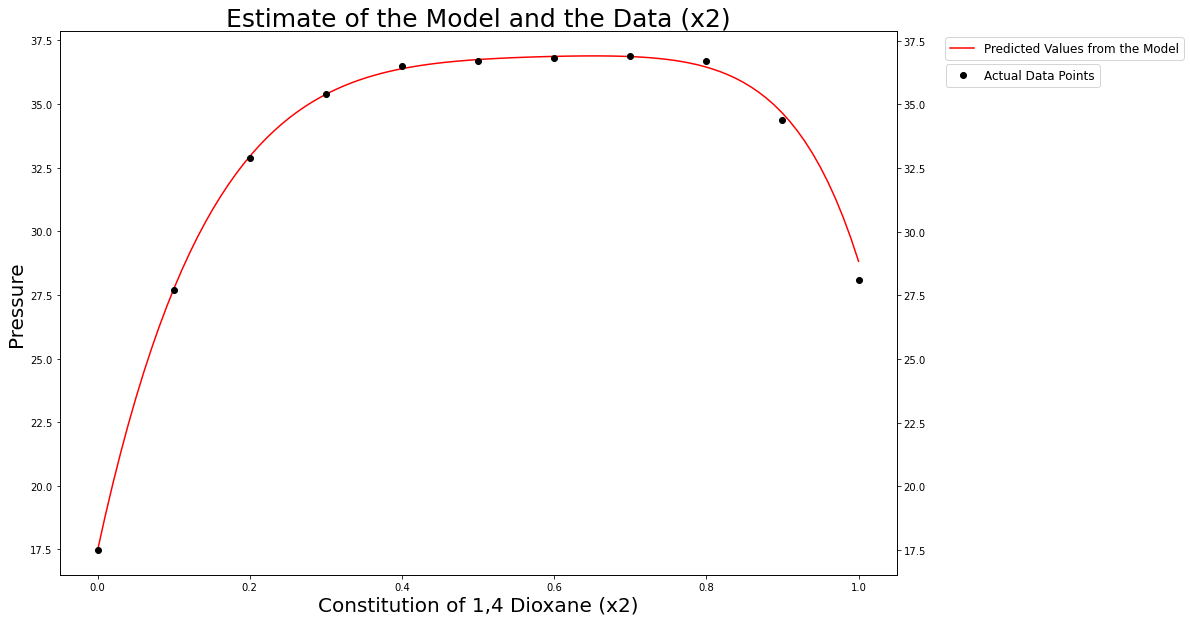

In [ ]:
plott, ax1 = plt.subplots(figsize = (15,10))
ax2 = ax1.twinx()
ax1.plot((1-x1_plt),p_plt,alpha=1,color = 'red')
ax2.plot(data_x2,data_y,'ko',alpha=1,)
plt.title('Estimate of the Model and the Data (x2)', fontsize = 25)
ax1.set_xlabel('Constitution of 1,4 Dioxane (x2)', fontsize = 20)
ax1.set_ylabel('Pressure', fontsize = 20)
ax1.legend(["Predicted Values from the Model"], bbox_to_anchor = (1.35, 1), fontsize = 12)
ax2.legend(['Actual Data Points'], bbox_to_anchor = (1.25, 0.95), fontsize = 12)

## As we can observe from the above graphs the optimized model fits the given data quite well.

 <h1><b> Question 2 <b></h1>

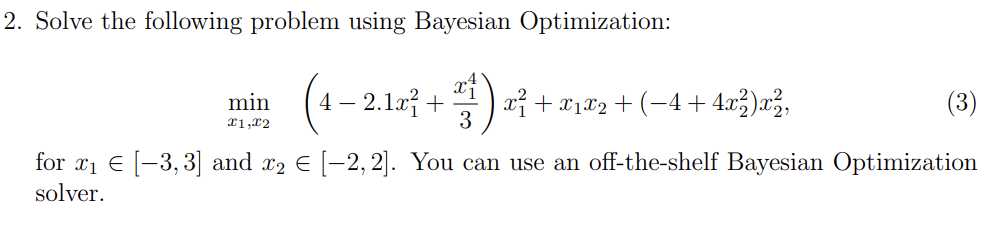

In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=4ae212357d32631658f74ddcd446b4a1e539a3e1cc6ea74f79f3e6b467b5c5fa
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


Importing the required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
from matplotlib.pyplot import figure
from bayes_opt import BayesianOptimization

Defining the Objective function

In [ ]:
def objective_function(x1, x2):
  # The Function is multiplied with "-" because this Bayesian Optimization solver can only maximize the function
  return -(((4 - 2.1*(x1**2) + ((x1**4)/3))*(x1**2)) + (x1*x2) + ((-4 + 4*(x2**2))*(x2**2)))

Defining the Bounds and the Bayesian Optimization Function

In [ ]:
pbounds = {'x1':(-3,3),'x2':(-2,2)}
optimizer = BayesianOptimization(f = objective_function, pbounds = pbounds, random_state = 1,)

Determining the minimum value using Bayesian Optimization

In [ ]:
optimizer.maximize(init_points = 25,n_iter = 100)

|   iter    |  target   |    x1     |    x2     |
-------------------------------------------------
|  1        |  0.265    | -0.4979   |  0.8813   |
|  2        | -110.1    | -2.999    | -0.7907   |
|  3        | -26.91    | -2.119    | -1.631    |
|  4        | -2.856    | -1.882    | -0.6178   |
|  5        | -1.054    | -0.6194   |  0.1553   |
|  6        |  0.5211   | -0.4848   |  0.7409   |
|  7        | -11.28    | -1.773    |  1.512    |
|  8        | -66.76    | -2.836    |  0.6819   |
|  9        | -0.5377   | -0.4962   |  0.2348   |
|  10       | -12.02    | -2.158    | -1.208    |
|  11       | -40.85    |  1.804    |  1.873    |
|  12       | -0.5433   | -1.119    |  0.7693   |
|  13       | -28.42    |  2.258    |  1.578    |
|  14       | -60.72    | -2.49     | -1.844    |
|  15       | -12.29    | -1.981    |  1.513    |
|  16       | -18.1     | -2.41     | -0.3156   |
|  17       | -54.18    |  2.747    |  0.1327   |
|  18       | -0.547    |  1.151    | -0.7379   |


In [ ]:
result = optimizer.max
target_value = -result['target']
minimum_x = result['params']
print(f'The Objective Function reaches the minimum value of {target_value} at {minimum_x}')

The Objective Function reaches the minimum value of -1.0301962172673473 at {'x1': -0.09639343210742446, 'x2': 0.7253759043013797}


**Hence, the minimum function value of -1.0301962172673473 is obtained at x1 = -0.09639343210742446 and x2 = 0.7253759043013797 using Bayesian Optimization.**

Plotting the function and comparing the obtained minimum value point

<Figure size 432x288 with 0 Axes>

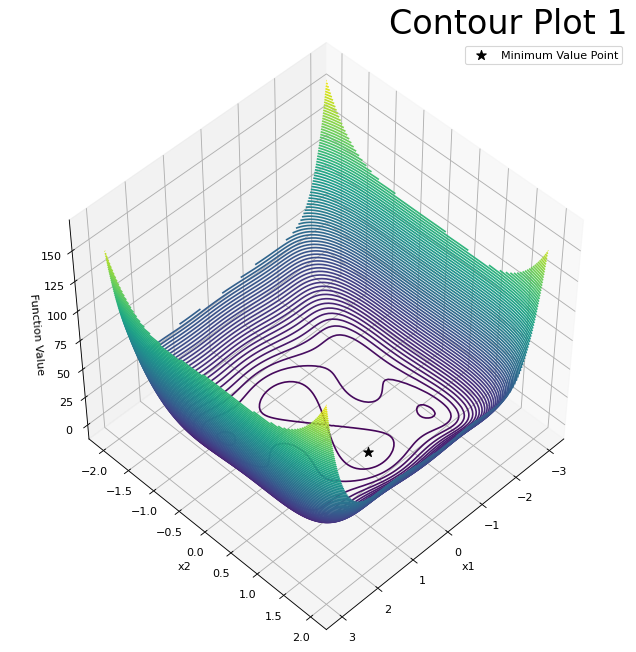

In [ ]:
x1_min = minimum_x['x1']
x2_min = minimum_x['x2']
from matplotlib import markers
x1_plot = np.linspace(-3, 3, num=100)
x2_plot = np.linspace(-2, 2, num=100)
X1, X2 = np.meshgrid(x1_plot, x2_plot)
Z = -1*objective_function(X1, X2)
fig = plt.figure()
figure(figsize=(10, 10), dpi=80)
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Z, 100)
ax.scatter(x1_min, x2_min, target_value,s = 80, marker = '*',c = 'k')
ax.legend(["Minimum Value Point"], loc='best', fontsize = 10)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Function Value');
ax.set_title('Contour Plot 1',fontsize=30,color="black",loc = "right")
ax.view_init(50, 45)

<Figure size 432x288 with 0 Axes>

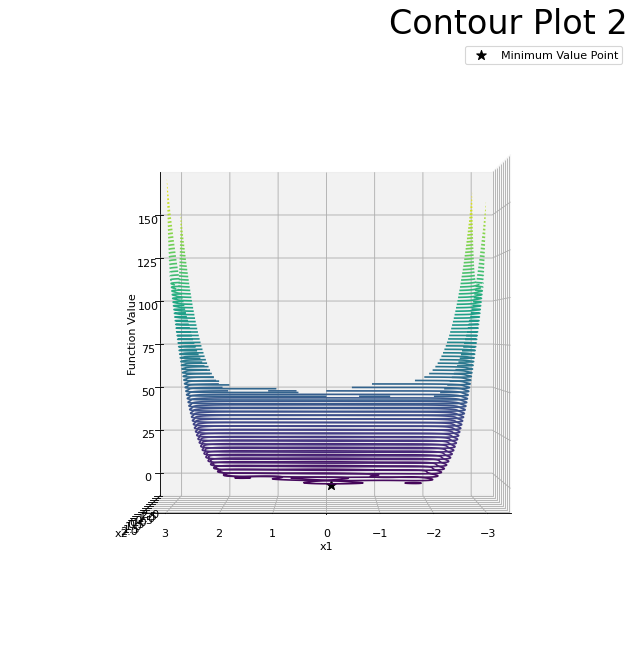

In [ ]:
from matplotlib import markers
x1_plot = np.linspace(-3, 3, num=100)
x2_plot = np.linspace(-2, 2, num=100)
X1, X2 = np.meshgrid(x1_plot, x2_plot)
Z = -1*objective_function(X1, X2)
fig = plt.figure()
figure(figsize=(10, 10), dpi=80)
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Z, 100)
ax.scatter(x1_min, x2_min, target_value,s = 80, marker = '*',c = 'k')
ax.legend(["Minimum Value Point"], loc='best', fontsize = 10)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Function Value');
ax.set_title('Contour Plot 2',fontsize=30,color="black",loc = "right")
ax.view_init(0, 90)